In [2]:
#@title Setup
!pip install trimesh==3.9.33 einops==0.3.2 scipy==1.5.2 \
             siren-pytorch==0.1.5 usd-core==21.8 \
             torch==1.9.0 torchtext==0.10.0 torchvision==0.10.0 cython==0.29.20 \
             git+https://github.com/openai/CLIP.git@04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10 \

  Cloning https://github.com/openai/CLIP.git (to revision 04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10) to /tmp/pip-req-build-g3n0n94t
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-g3n0n94t
  Running command git rev-parse -q --verify 'sha^04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10'
  Running command git fetch -q https://github.com/openai/CLIP.git 04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10
  Running command git checkout -q 04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10
     |████████████████████████████████| 638 kB 12.4 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
     |████████████████████████████████| 831.4 MB 2.8 kB/s 
     |████████████████████████████████| 7.6 MB 58.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 2.0 MB 57.5 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for clip: filename=clip

In [3]:
#@title Install dependency (Kaolin)
!git clone --recursive https://github.com/NVIDIAGameWorks/kaolin
%cd kaolin
!git checkout v0.10.0
!python setup.py develop
%cd ..

Cloning into 'kaolin'...
remote: Enumerating objects: 3560, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 3560 (delta 57), reused 91 (delta 44), pack-reused 3417
Receiving objects: 100% (3560/3560), 84.00 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (1839/1839), done.
Submodule 'third_party/cub' (https://github.com/NVIDIA/cub) registered for path 'third_party/cub'
Submodule 'third_party/nvdiffrast' (https://github.com/NVlabs/nvdiffrast) registered for path 'third_party/nvdiffrast'
Cloning into '/content/kaolin/third_party/cub'...
remote: Enumerating objects: 30872, done.        
remote: Counting objects: 100% (21/21), done.        
remote: Compressing objects: 100% (17/17), done.        
remote: Total 30872 (delta 6), reused 10 (delta 4), pack-reused 30851        
Receiving objects: 100% (30872/30872), 16.38 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (26187/26187), done.
Cloning into '/content/kaolin/third_pa

In [9]:
#@title Get text2mesh
!git clone https://github.com/threedle/text2mesh
%cd text2mesh

Cloning into 'text2mesh'...
remote: Enumerating objects: 1079, done.
remote: Total 1079 (delta 0), reused 0 (delta 0), pack-reused 1079
Receiving objects: 100% (1079/1079), 1.92 GiB | 25.43 MiB/s, done.
Resolving deltas: 100% (362/362), done.
/content/text2mesh


In [10]:
obj_path = "data/source_meshes/person.obj"  #@param {type: "string"}
n_iter = 750  #@param {type: "integer"}
prompt = "a 3D rendering of a ninja in unreal engine"
output_dir = "./results2"

In [11]:
#@title Run text2mesh, the intermediate results can be seen in 'text2mesh/results' directory
!python main.py --run branch \
                --obj_path {obj_path} \
                --output_dir {output_dir} \
                --prompt "{prompt}" \
                --sigma 12.0  --clamp tanh --n_normaugs 4 --n_augs 1 --normmincrop 0.1 --normmaxcrop 0.4 \
                --geoloss --colordepth 2 --normdepth 2 --frontview --frontview_std 4 --clipavg view \
                --lr_decay 0.9 --clamp tanh --normclamp tanh  --maxcrop 1.0 --save_render --seed 29 \
                --n_iter {n_iter}  --learning_rate 0.0005 --normal_learning_rate 0.0005 --standardize --no_pe --symmetry --background 1 1 1

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 249MiB/s]
ModuleList(
  (0): FourierFeatureTransform()
  (1): Linear(in_features=515, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=256, bias=True)
  (8): ReLU()
  (9): Linear(in_features=256, out_features=256, bias=True)
  (10): ReLU()
)
ModuleList(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=3, bias=True)
)
ModuleList(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=1, bias=True)
)
  0% 0/750 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-pack

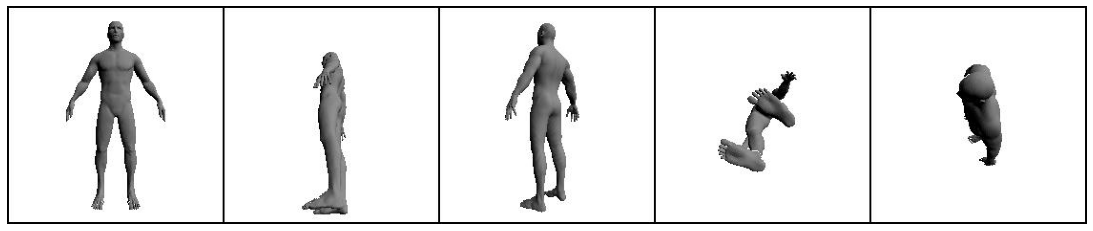

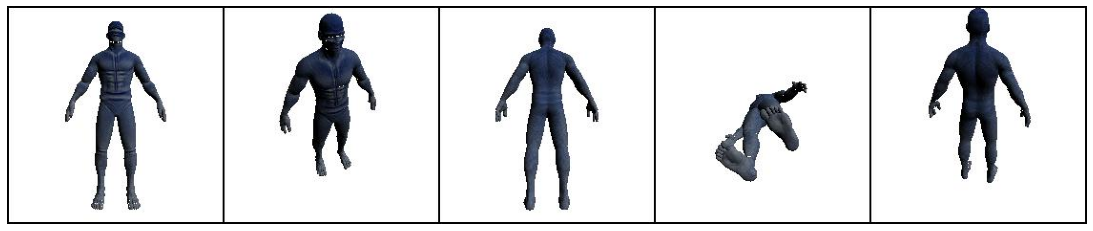

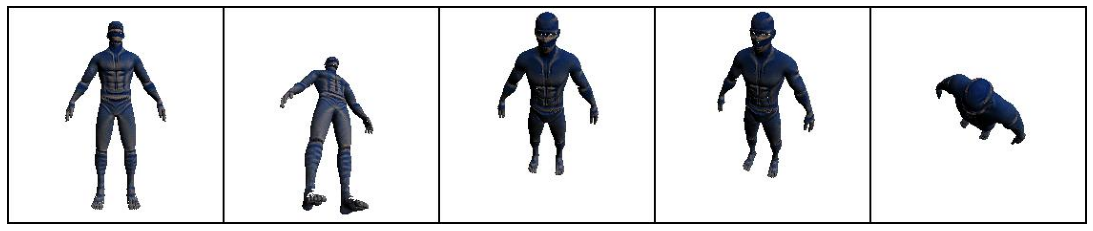

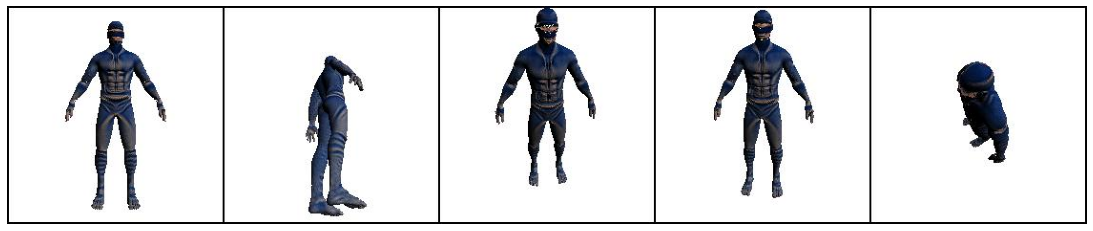

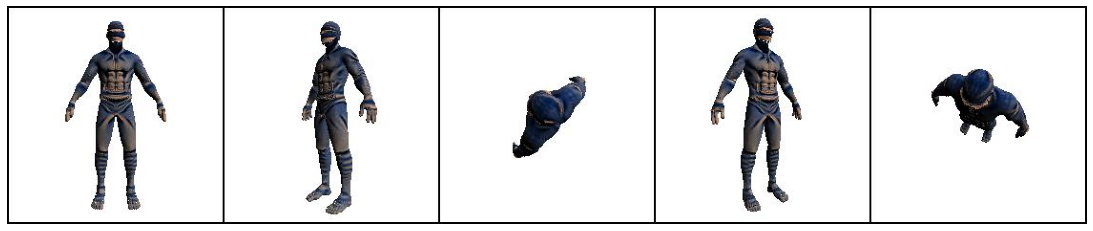

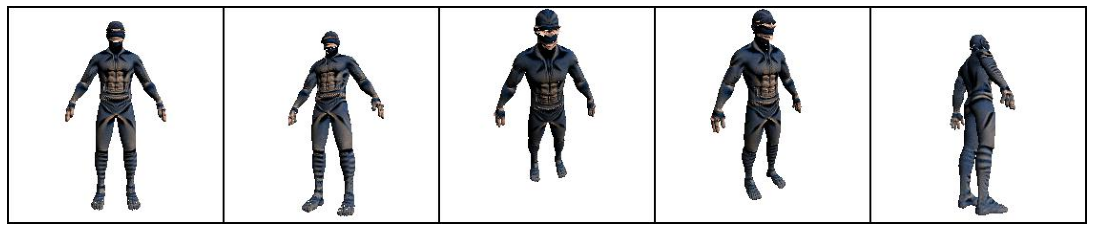

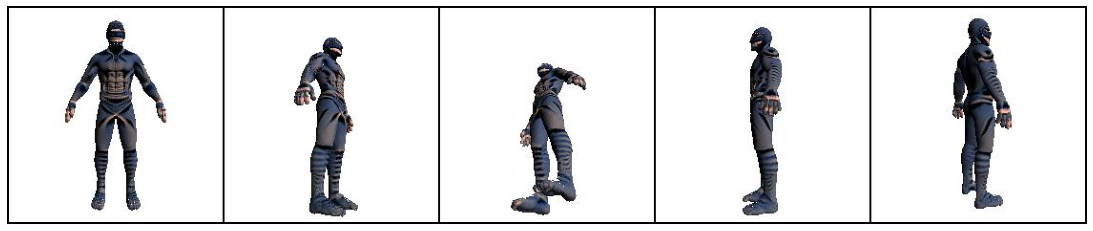

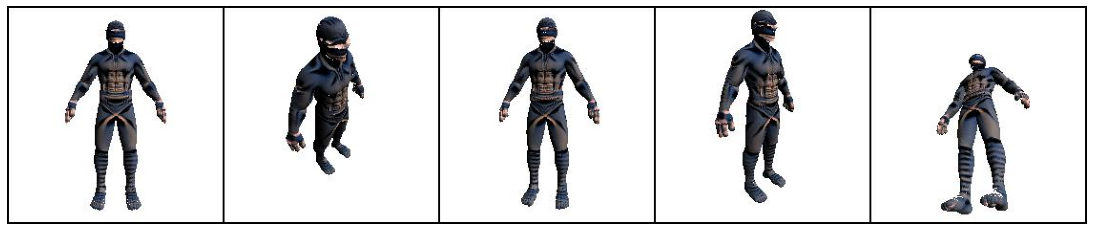

In [13]:
#@title export the results
import matplotlib.pyplot as plt
import importlib
import PIL
importlib.reload(PIL.TiffTags)
import cv2
import os


frames = []
for i in range(0, n_iter, 100):
    img = cv2.imread(os.path.join(output_dir, f"iter_{i}.jpg"))
    frames.append(img)
    plt.figure(figsize=(20, 4))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [14]:
#@title create video
from IPython.display import display, HTML
from base64 import b64encode
from tqdm.auto import tqdm
import cv2
fps = 2


video = cv2.VideoWriter("video.avi", 0, fps, frames[0].shape[:2][::-1]);
for im in tqdm(frames):
    video.write(im)
video.release()
!ffmpeg -y -i video.avi -pix_fmt yuv420p video.mp4 2> /dev/null
mp4 = open("video.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
display(HTML(f"""
<video width={frames[0].shape[1]} controls>
      <source src="{data_url}" type="video/mp4">
</video>
"""))

  0%|          | 0/8 [00:00<?, ?it/s]